In [31]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import sklearn

print("All packages imported successfully!")


All packages imported successfully!


In [32]:
df = pd.read_csv("../data/raw/heart_disease.csv", header=None)

# Show first 5 rows
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [33]:
# Add official feature names (based on UCI Heart Disease documentation)
column_names = [
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang",
    "oldpeak", "slope", "ca", "thal", "target"
]

df.columns = column_names

# Preview first 5 rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## 🧬 Feature Descriptions (Clinical Meaning)

- **age** – Patient age in years  
- **sex** – 1 = male, 0 = female  
- **cp (chest pain type)**  
  - 1: typical angina  
  - 2: atypical angina  
  - 3: non-anginal pain  
  - 4: asymptomatic  
- **trestbps** – Resting blood pressure (mm Hg)  
- **chol** – Serum cholesterol (mg/dl)  
- **fbs** – Fasting blood sugar >120 mg/dl (1 = true; 0 = false)  
- **restecg** – Resting ECG results (0–2)  
- **thalach** – Maximum heart rate achieved  
- **exang** – Exercise-induced angina (1 = yes; 0 = no)  
- **oldpeak** – ST depression induced by exercise  
- **slope** – Slope of the peak exercise ST segment  
- **ca** – Number of major coronary vessels (0–3)  
- **thal** – Thalassemia test result  
  - 1 = fixed defect  
  - 2 = normal  
  - 3 = reversible defect  
- **target** – 1 = CAD present, 0 = no CAD


In [34]:
# Number of rows and columns
df.shape


(303, 14)

In [35]:
# Data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [36]:
# Summary statistics for all numeric columns
df.describe(include='all')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,166,NaN
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,NaN,NaN,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,NaN,NaN,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,2.000000


In [37]:
# Fix 'ca' and 'thal' columns
import numpy as np

# Replace '?' with NaN
df['ca'] = df['ca'].replace('?', np.nan)
df['thal'] = df['thal'].replace('?', np.nan)

# Convert to numeric
df['ca'] = pd.to_numeric(df['ca'])
df['thal'] = pd.to_numeric(df['thal'])

# Check missing values after conversion
df[['ca', 'thal']].isnull().sum()


ca      4
thal    2
dtype: int64

In [38]:
# Fill missing values with mode
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

# Verify
df[['ca', 'thal']].isnull().sum()


ca      0
thal    0
dtype: int64

In [39]:
# Convert target to binary: 0 = no CAD, 1 = CAD
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Verify unique values
df['target'].unique()


array([0, 1])

<Figure size 1500x1200 with 0 Axes>

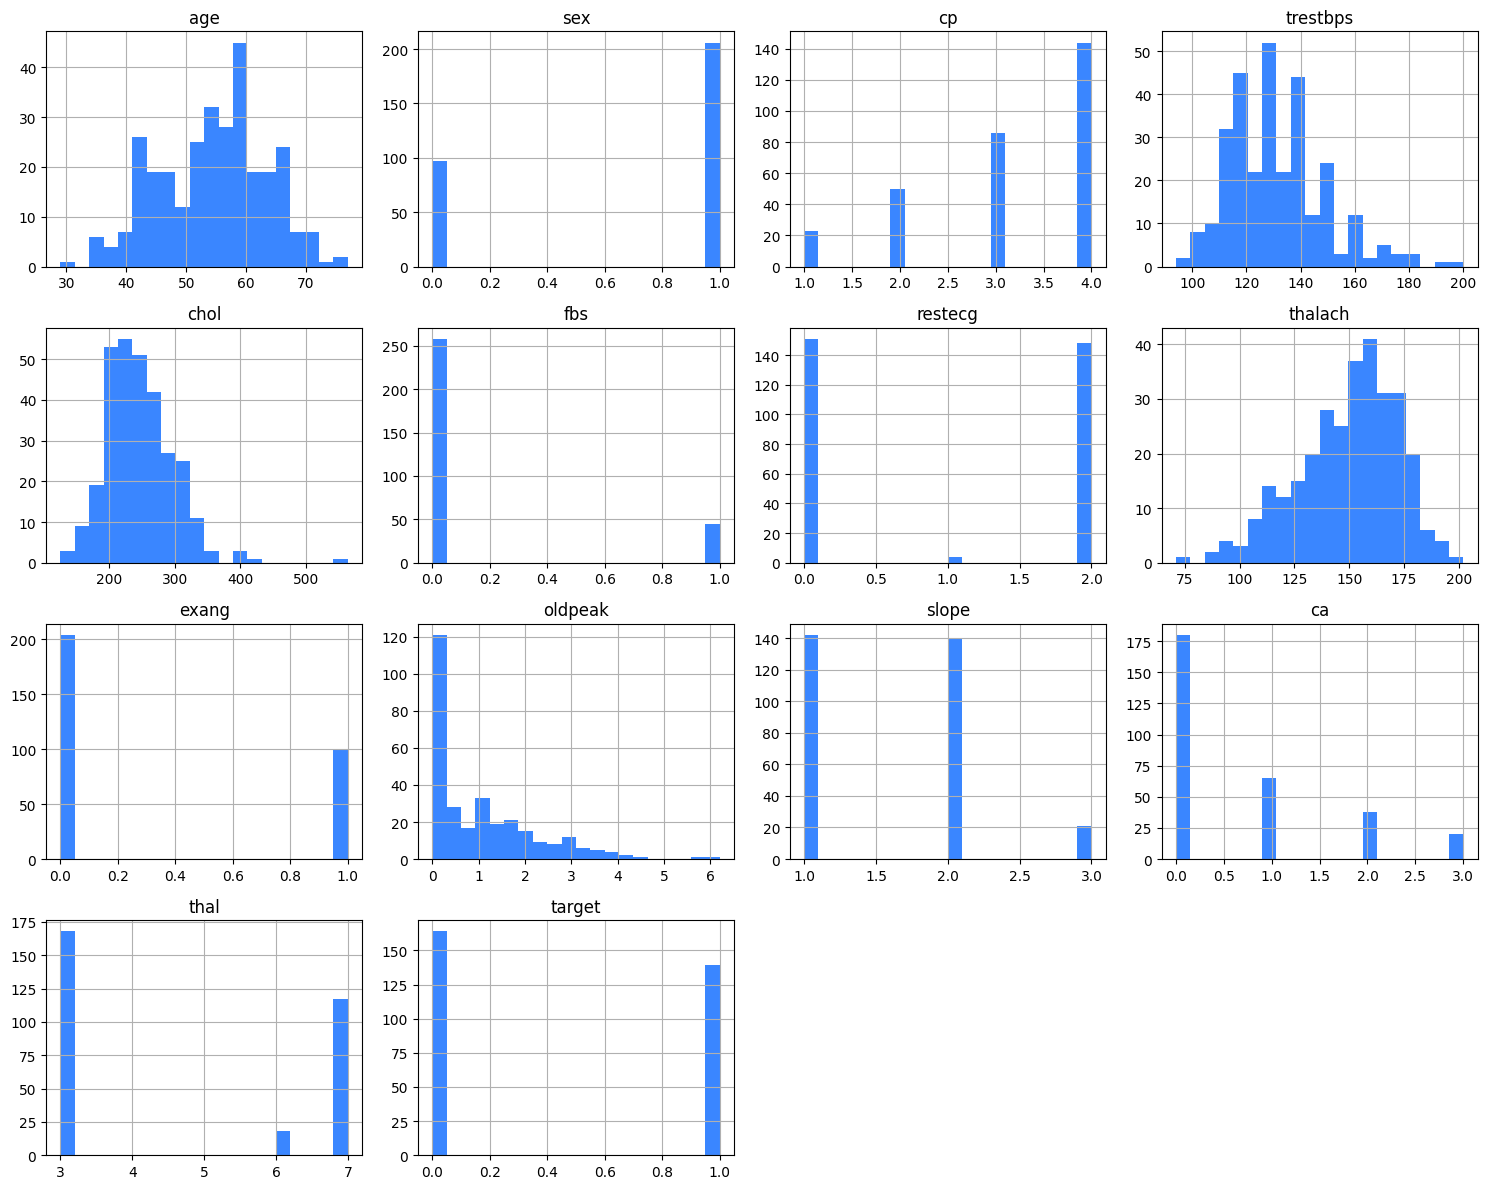

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
df.hist(bins=20, figsize=(15, 12), color="#3A86FF")
plt.tight_layout()
plt.show()


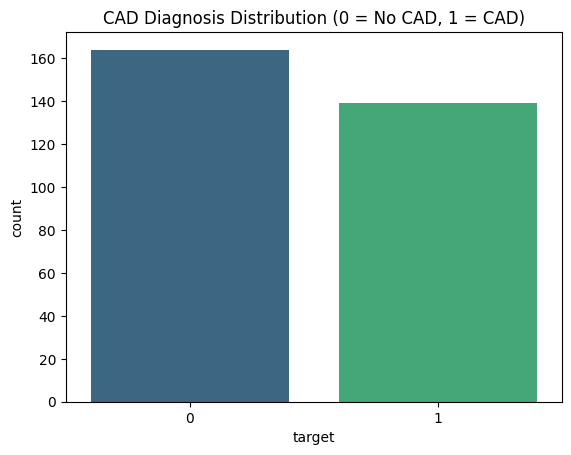

In [41]:
sns.countplot(x='target', data=df, palette='viridis', hue='target', legend=False)
plt.title("CAD Diagnosis Distribution (0 = No CAD, 1 = CAD)")
plt.show()


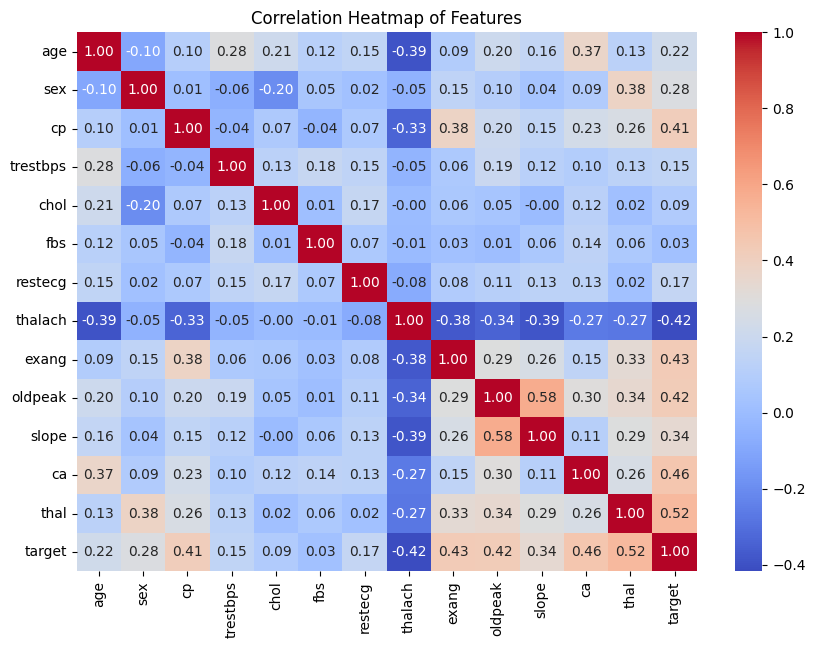

In [42]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Features")
plt.show()


In [43]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [44]:
categorical_cols = ['cp', 'restecg', 'slope', 'thal']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [45]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((242, 18), (61, 18))

In [46]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [47]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
y_pred = log_reg.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed performance
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.8360655737704918

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.82      0.88      0.85        32

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)


,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [49]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42,
    tree_method='hist',       # <-- IMPORTANT for compatibility
    eval_metric='logloss'     # <-- stops the warning
)

xgb.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [50]:
y_pred_xgb = xgb.predict(X_test)


In [51]:
from sklearn.metrics import accuracy_score, classification_report

# --- Predictions ---
y_pred_log = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# --- Print Results ---
print("🔵 Logistic Regression Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("\n🟢 Random Forest Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("\n🟣 XGBoost Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


🔵 Logistic Regression Performance
Accuracy: 0.8360655737704918
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.82      0.88      0.85        32

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61


🟢 Random Forest Performance
Accuracy: 0.9016393442622951
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


🟣 XGBoost Performance
Accuracy: 0.7868852459016393
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accur

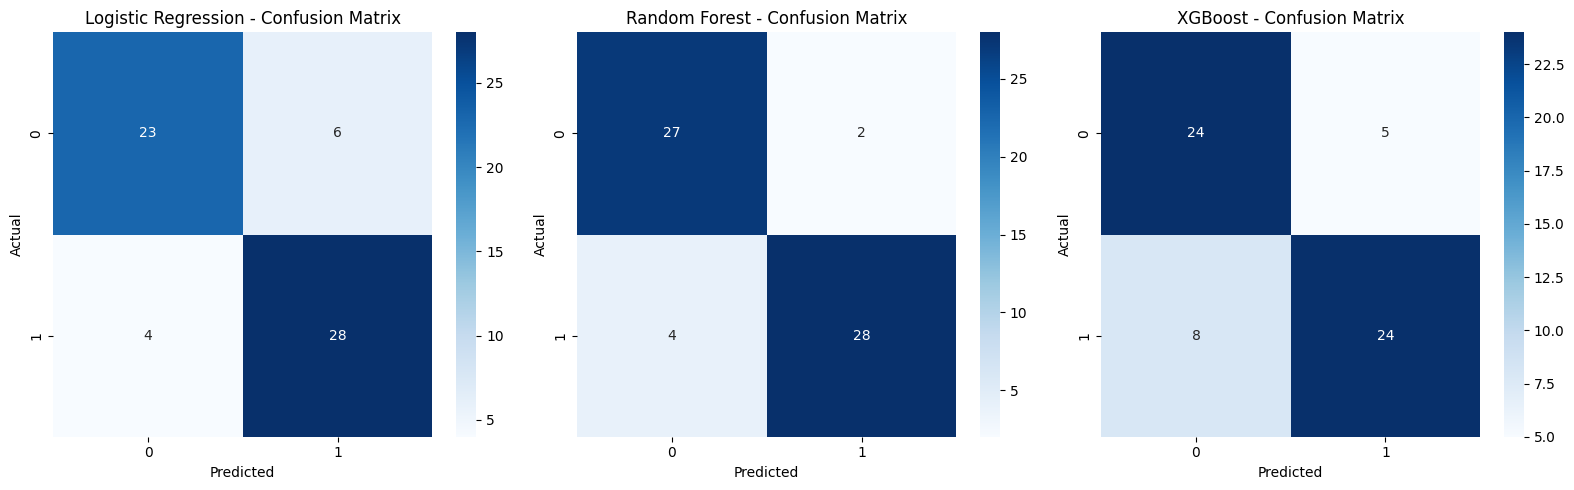

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": y_pred_log,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb
}

plt.figure(figsize=(16, 5))

for i, (name, preds) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()


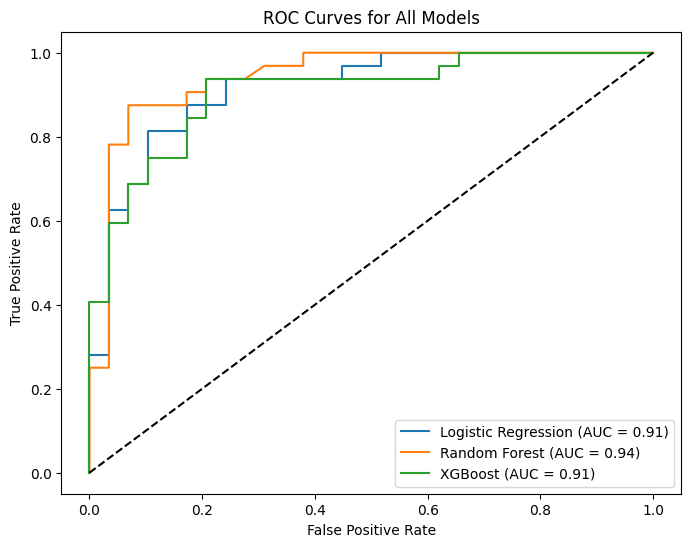

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8, 6))

# Probabilities
y_prob_log = log_reg.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Plot ROC curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_log):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_score(y_test, y_prob_xgb):.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend()
plt.show()


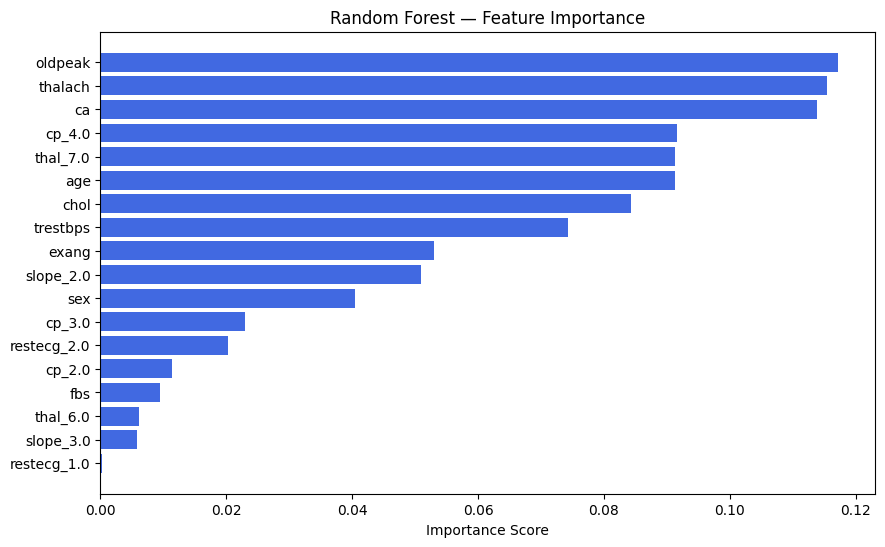

In [54]:


# Feature importance from Random Forest
importances = rf.feature_importances_
features = X_train.columns

# Sort values
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Random Forest — Feature Importance")
plt.barh(features[indices], importances[indices], color='royalblue')
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()


<Figure size 1000x600 with 0 Axes>

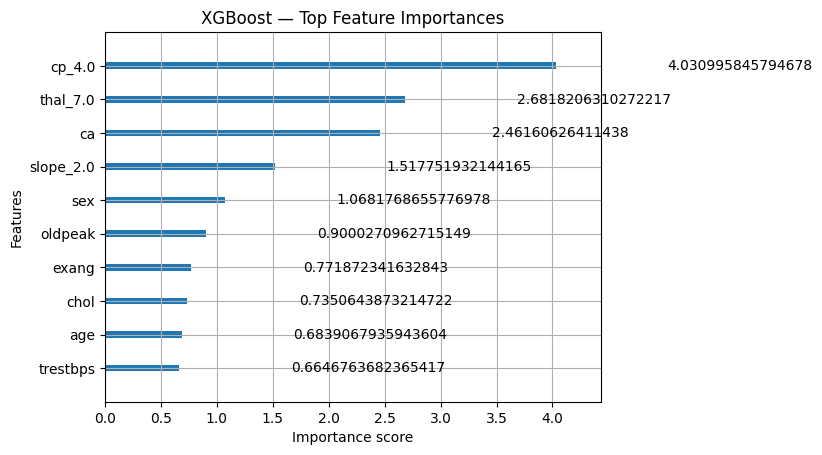

In [55]:
from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(xgb, max_num_features=10, importance_type='gain')
plt.title("XGBoost — Top Feature Importances")
plt.show()


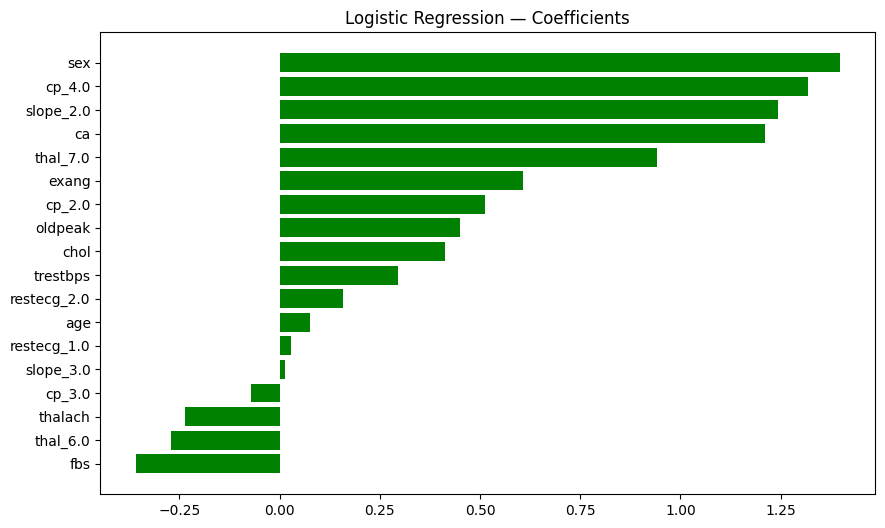

In [56]:
coef = log_reg.coef_[0]
features = X_train.columns

# Create dataframe
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coef
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='green')
plt.title("Logistic Regression — Coefficients")
plt.gca().invert_yaxis()
plt.show()


In [57]:
import pickle


In [58]:
# Save model as pickle
with open("cad_random_forest_model.pkl", "wb") as file:
    pickle.dump(rf, file)

print("Model saved successfully as cad_random_forest_model.pkl")


Model saved successfully as cad_random_forest_model.pkl


In [59]:
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("Scaler saved successfully as scaler.pkl")


Scaler saved successfully as scaler.pkl
